In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = pybamm.lithium_ion.DFN(
    {
        "open circuit potential": "current sigmoid",
        "thermal": "lumped",
        "SEI": "interstitial-diffusion limited",
        "SEI on cracks": "true",
        "SEI film resistance": "distributed", 
        "SEI porosity change": "true",
        "particle mechanics": ("swelling and cracking", "swelling only"),
    }
)
param = pybamm.ParameterValues("OKane2023")
param.update({"Initial inner SEI thickness [m]": 3.595E-8})
param.update({"Initial outer SEI thickness [m]": 3.595E-8})
param.update({"Negative electrode porosity": 0.22239})
param.update({"Inner SEI lithium interstitial diffusivity [m2.s-1]": 3e-19})
param.update({"Negative electrode cracking rate": 1e-22})
exp = pybamm.Experiment(["Hold at 4.2 V until C/100", "Rest for 4 hours"])
var_pts = {
    "x_n": 5,  # negative electrode
    "x_s": 5,  # separator 
    "x_p": 5,  # positive electrode
    "r_n": 30,  # negative particle
    "r_p": 20,  # positive particle
}
sim = pybamm.Simulation(
    model, 
    experiment=exp,
    parameter_values=param,
    solver=pybamm.CasadiSolver(),
    var_pts=var_pts,
)
solution = sim.solve()

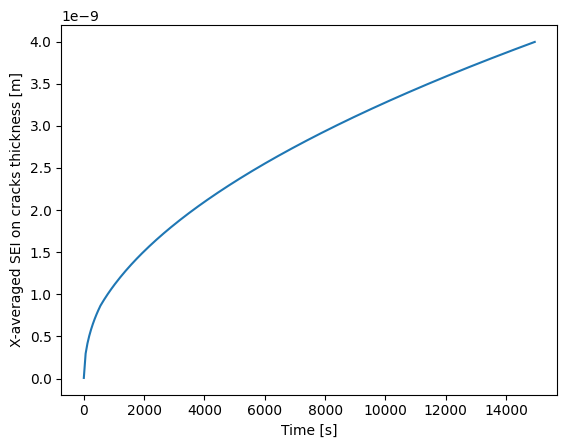

In [4]:
t = solution["Time [s]"].entries
L_SEI_cr = solution["X-averaged SEI on cracks thickness [m]"].entries
plt.figure()
plt.plot(t,L_SEI_cr)
plt.xlabel("Time [s]")
plt.ylabel("X-averaged SEI on cracks thickness [m]")
plt.show()